# MNIST Data

In [1]:
# https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [1]:
# Loading data
# data from kaggle: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dO = pd.read_csv('/Users/anand/Documents/Datasets/digit-recognizer/train.csv')
dO.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Saving the label into a variable l
l = dO['label']

In [3]:
# Drop the label feature and store the pixel data in d
d = dO.drop('label', axis=1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


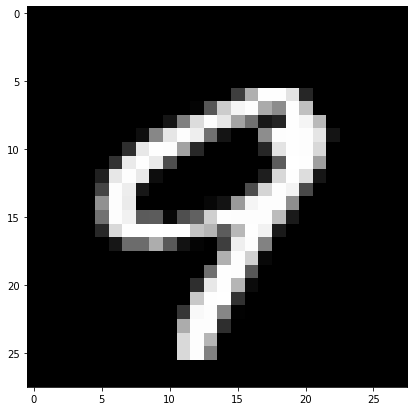

In [5]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 100

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

In [6]:
print(l[idx])

9


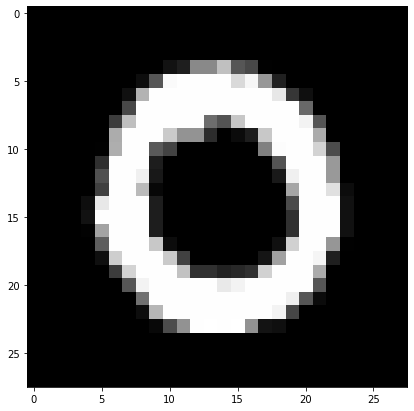

0


In [7]:
# Display or plot a number
plt.figure(figsize=(7,7))
idx = 1

# grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshape from 1D to 2D
grid_data = d.iloc[idx].values.reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

# 2D Vizualization using PCA

In [8]:
# Pick the first 15K data-points to work on for time-efficiency
# Exercise: Perform the same analysis on all of the 42K data-points


In [9]:
labels = l.head(15000)
data = d.head(15000)

In [10]:
print(l.shape, d.shape)

(42000,) (42000, 784)


In [11]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [12]:
# Find the co-variance matrix which is 1/n * A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

covar_matrix.shape

(784, 784)

In [13]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2Dim Space
from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783)) # eigen values are in ascending order, taking the top 2

vectors.shape

/var/folders/p_/fs2tb7r13c534frxmkk64z4w0000gn/T/ipykernel_1852/370669600.py:5: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(782,783)) # eigen values are in ascending order, taking the top 2


(784, 2)

In [14]:
vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
vectors = vectors.T

In [16]:
vectors.shape

(2, 784)

In [17]:
# Projecting the original data sample on the plane

import matplotlib.pyplot as plt 
new_coordinates = np.matmul(vectors, sample_data.T)

print(vectors.shape, sample_data.shape, new_coordinates.shape)

(2, 784) (15000, 784) (2, 15000)


In [18]:
import pandas as pd

# appending label to the 2nd projected data

new_coordinates = np.vstack((new_coordinates,labels)).T 

# creating a new data frame for ploting the labeled points

dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_pricipal','label'))

dataframe.head()

,1st_principal,2nd_pricipal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


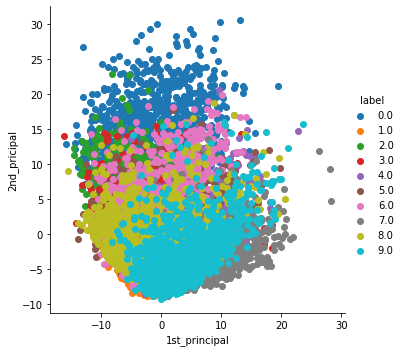

In [19]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='label',height=5, aspect=1).map(plt.scatter, '1st_principal','2nd_pricipal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [20]:
from sklearn import decomposition
pca = decomposition.PCA()

In [21]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

pca_data.shape

(15000, 2)

In [22]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T
pca_data


array([[-5.04378712, -5.55666131,  1.        ],
       [19.30521699,  6.19382618,  0.        ],
       [-7.67861086, -1.91149824,  1.        ],
       ...,
       [-1.5073096 , -2.14786736,  8.        ],
       [-6.53727189,  3.20414818,  9.        ],
       [-1.25637409, -6.87809169,  6.        ]])

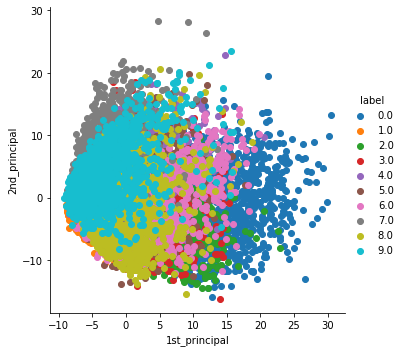

In [23]:

# creating a new dataframe which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue='label', height=5, aspect=1).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for Dimensionality reduction (not for Visualization)

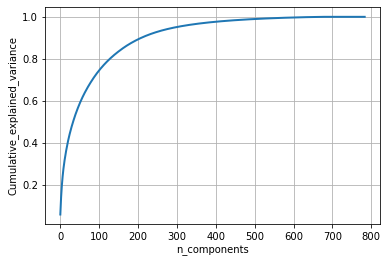

In [26]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()